In [1]:
from fenics import *
import numpy as np
import pylab as plt 
parameters.plotting_backend = 'matplotlib'
%matplotlib inline

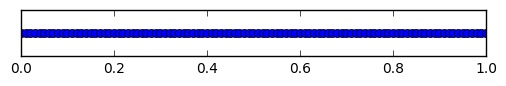

In [2]:
mesh = UnitIntervalMesh(100)
plot(mesh)

V = FunctionSpace(mesh, 'CG', 1)
thetat = TestFunction(V)
delta_theta = TrialFunction(V)
theta0 = interpolate(Constant(pi/2.),V)
#theta0 = interpolate(Expression("pi/2+k0*x[0]",k0=k0,degree=1),V)

In [3]:
F1 = 0.1
L1 = (11.8e-2)/2
E1 = 1.3e6
b1 = 4.e-2
h1 = 0.7e-2
I1 = b1*(h1**3)/12.

lam = F1*(L1**2.)/(E1*I1)

a_k = inner(delta_theta.dx(0),thetat.dx(0))*dx
a_g = inner(delta_theta,thetat)*dx
k0 = -1.

def cl(x, on_boundary):
    return on_boundary and near(x[0],0.)

bc = DirichletBC(V,0.,cl)

In [4]:
tol = 1e-10
iter = 0
maxiter = 100
err = 100.
while err > tol and iter < maxiter:
    a_n = a_k-lam*a_g
    l_n = Constant(-1.)*(inner((theta0.dx(0)-k0),thetat.dx(0)) + lam*inner(cos(theta0),thetat))*dx
    dtheta = Function(V)
    solve(a_n==l_n,dtheta,bc)
    L = assemble(l_n)
    err = norm(L)
    theta0 = theta0 + dtheta
    iter = iter+1

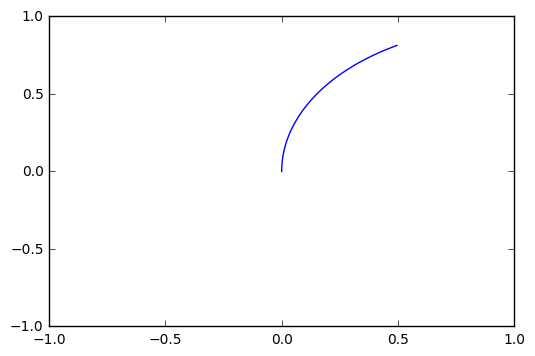

In [5]:
def xy_shape(theta0):
    VXY = VectorFunctionSpace(mesh,'P',1,dim = 2)
    (X,Y) = TrialFunctions(VXY)
    (X_chap,Y_chap) = TestFunctions(VXY)
    bc = DirichletBC(VXY, (0.,0.), "x[0] == 0.")
    a_x = X.dx(0)*X_chap*dx
    L_x = cos(theta0)*X_chap*dx
    a_y = Y.dx(0)*Y_chap*dx
    L_y = sin(theta0)*Y_chap*dx
    xy = Function(VXY)
    solve(a_x + a_y == L_x + L_y, xy, bc)
    return xy

def xy_vertex_values(xy):
    (xs,ys) = xy.split(deepcopy=True)
    xsv = xs.compute_vertex_values()
    ysv = ys.compute_vertex_values()
    return (xsv, ysv)

def plot_shape(theta0):
    (xsv,ysv) = xy_vertex_values(xy_shape(theta0))
    myplot = plt.plot(xsv,ysv)
    plt.ylim([-1.,1.])
    plt.xlim([-1.,1.])
    return myplot

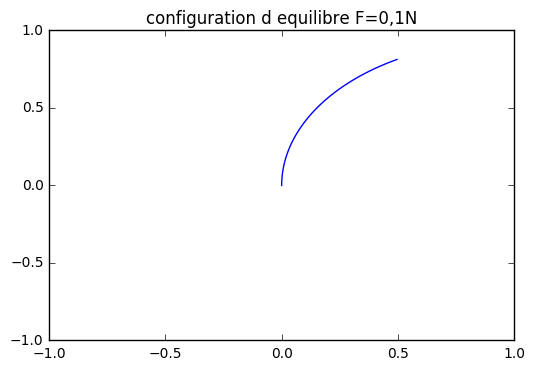

In [16]:
plt.figure(1)
plot_shape(theta0)
plt.title('configuration d equilibre F=0,1N')
plt.savefig('flamb01.png')
plt.show()